In [1]:
from acquire import acquire_zillow
from prepare import prepare_zillow
from utilities import nan_null_empty_check, explore_univariate

# Attention Grabbing Title!

## Executive Summary

## Planning

#### Data Dictionary

## Acquisition

Data was obtained from the *zillow* database using this query:
> `SELECT bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, taxamount, fips
	FROM properties_2017
		JOIN predictions_2017 USING(parcelid)
	WHERE (transactiondate BETWEEN '2017-05-01' AND '2017-08-31')
		AND (unitcnt = 1 OR propertylandusetypeid IN (261, 279, 262, 263, 264, 266, 275))
		AND calculatedfinishedsquarefeet IS NOT NULL
		AND bathroomcnt IS NOT NULL
		AND bedroomcnt IS NOT NULL
		AND fips IS NOT NULL
		AND taxvaluedollarcnt IS NOT NULL
		AND taxamount IS NOT NULL;`

Initially, using only `unitcnt = 1` did not provide adequate distribution of data points across the different FIPS county codes, so additional `propertylandusetypeid` values were used to bring in more data. Single unit properties were defined as "a property that can be purchased or rented as a single entity." These `propertylandusetypeid` values met that definition:
* 261 - single family residential 
* 262 - rural residence
* 263 - mobile home
* 264 - townhouse
* 266 - condominium
* 275 - manufactured, modular, prefabricated homes
* 279 - inferred single family residential

The acquisition was scripted with the `acquire_zillow` function.

In [2]:
zillow_df = acquire_zillow()

## Preparation

The resulting data frame was double-checked for missing values and none were found.

In [3]:
nan_null_empty_check(zillow_df)

NaN values
Empty DataFrame
Columns: [rows, columns]
Index: []
--------------------------------
Empty values
Empty DataFrame
Columns: [rows, columns]
Index: []
--------------------------------


{'nan_positions': (array([], dtype=int64), array([], dtype=int64)),
 'empty_positions': (array([], dtype=int64), array([], dtype=int64))}

The selected features were all numerical values and the only apparent task from the information on the data frame was renaming the column names.

In [4]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39386 entries, 0 to 39385
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   39386 non-null  float64
 1   bedroomcnt                    39386 non-null  float64
 2   calculatedfinishedsquarefeet  39386 non-null  float64
 3   taxvaluedollarcnt             39386 non-null  float64
 4   taxamount                     39386 non-null  float64
 5   fips                          39386 non-null  float64
dtypes: float64(6)
memory usage: 1.8 MB


However, univariate exploration revealed that outliers were skewing the distributions of the features to the right and they would have to be removed. 1.5 * IQR was used to determine the lower and upper bounds for outliers.

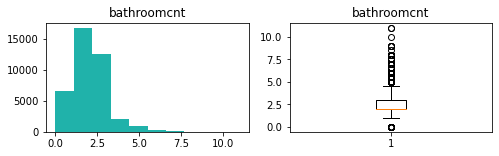

count    39386.000000
mean         2.298240
std          0.948054
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: bathroomcnt, dtype: float64


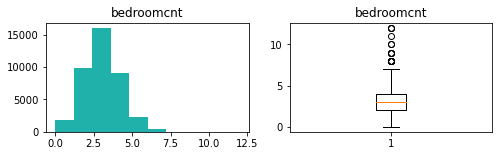

count    39386.000000
mean         3.027370
std          1.015964
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: bedroomcnt, dtype: float64


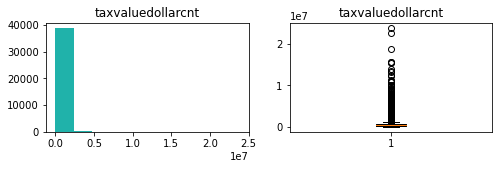

count    3.938600e+04
mean     4.969656e+05
std      6.244538e+05
min      1.000000e+03
25%      2.118852e+05
50%      3.669950e+05
75%      5.798970e+05
max      2.385837e+07
Name: taxvaluedollarcnt, dtype: float64


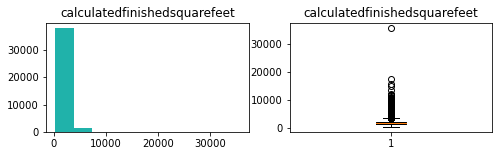

count    39386.000000
mean      1773.808079
std        946.259135
min        240.000000
25%       1180.000000
50%       1538.000000
75%       2095.000000
max      35640.000000
Name: calculatedfinishedsquarefeet, dtype: float64


In [5]:
explore_univariate(zillow_df, [], quant_vars=['bathroomcnt', 'bedroomcnt', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet'])

These preparation steps were scripted into the `prepare_zillow` function that returns a dictionary containing the prepared data frame of the entire population and the train, validate, test samples. The removal of outliers made the bathroom and bedroom distributions more normal, but tax value and total square feet distributions remained right skewed, but to a lesser degree.

In [6]:
prepped_data = prepare_zillow(zillow_df)

population = prepped_data['population']
train, validate, test = prepped_data['samples']

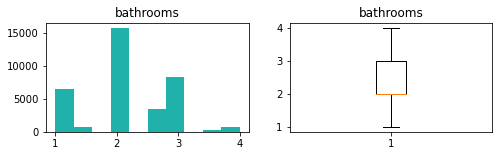

count    35817.000000
mean         2.140562
std          0.723454
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: bathrooms, dtype: float64


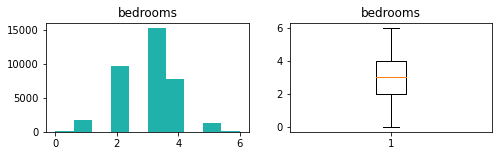

count    35817.000000
mean         2.925064
std          0.934158
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: bedrooms, dtype: float64


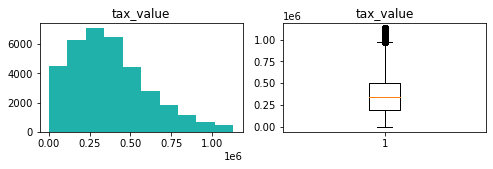

count    3.581700e+04
mean     3.761109e+05
std      2.331854e+05
min      1.000000e+03
25%      1.976420e+05
50%      3.401180e+05
75%      5.083130e+05
max      1.131770e+06
Name: tax_value, dtype: float64


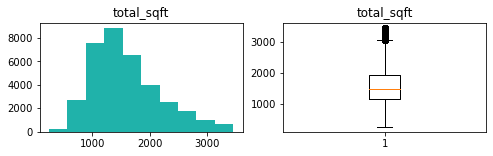

count    35817.000000
mean      1588.878186
std        598.431572
min        240.000000
25%       1150.000000
50%       1470.000000
75%       1919.000000
max       3466.000000
Name: total_sqft, dtype: float64


In [7]:
explore_univariate(population, [], ['bathrooms', 'bedrooms', 'tax_value', 'total_sqft'])